In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install pandas_datareader
# !pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader.data as pdr
import re
import seaborn as sns
import io
import zipfile
from datetime import datetime
%matplotlib inline

In [2]:
df=pd.DataFrame(pd.read_csv('UA.csv',error_bad_lines=False))

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
### Data range 2019-01-01 to 2020-12-31
print(df['legDepartureDate'].head(5))
print(df['legDepartureDate'][2000000:2000005])
print(df['legDepartureDate'].tail(5))

0    2019-01-01
1    2019-01-01
2    2019-01-01
3    2019-01-01
4    2019-01-01
Name: legDepartureDate, dtype: object
2000000    2019-06-01
2000001    2019-06-01
2000002    2019-06-01
2000003    2019-06-01
2000004    2019-06-01
Name: legDepartureDate, dtype: object
6963294    2020-12-31
6963295    2020-12-31
6963296    2020-12-31
6963297    2020-12-31
6963298    2020-12-31
Name: legDepartureDate, dtype: object


In [5]:
df.head(5)

,recordid,legNumber,segmentNumber,carrierCode,carrierName,flightNumber,cabinClass,connection,TripType,segmentDepartureAirportCode,...,Total Fare sans tax,Tax,Leg Fare,advBookingDays,StockMarket,StockTicker,DataSource,FilenameHash,LegInternational,SegInternational
0,330336798,3,2,UA,United Airlines,2310.0,Economy,YES,Round Trip,RSW,...,992.68,115.55,289.44,15,NASDAQ,UAL,3,ca063757646a,D,D
1,22823944,1,1,UA,United Airlines,5309.0,Economy,YES,Round Trip,SAT,...,966.00,291.83,481.08,36,NASDAQ,UAL,2,f815563712d2,D,I
2,21799015,2,2,UA,United Airlines,2299.0,Business,NO,Round Trip,SAN,...,783.26,87.14,391.63,78,NASDAQ,UAL,2,81faec000297,D,D
3,22311490,1,1,UA,United Airlines,480.0,Economy,NO,One Way,IAH,...,228.84,31.36,228.84,11,NASDAQ,UAL,2,e58afec7bcbf,D,D
4,321184279,1,1,UA,United Airlines,773.0,Economy,NO,Round Trip,DEN,...,556.28,70.12,278.14,1,NASDAQ,UAL,3,ba5fcce8afee,D,D


In [6]:
df.columns

Index(['recordid', 'legNumber', 'segmentNumber', 'carrierCode', 'carrierName',
       'flightNumber', 'cabinClass', 'connection', 'TripType',
       'segmentDepartureAirportCode', 'segmentArrivalAirportCode',
       'legBookingDate', 'legDepartureDate', 'legDepartureTime',
       'legDepartureAirportCode', 'legDepartureAirportName',
       'legDepartureCity', 'legDepartureState', 'legDepartureCountryCode',
       'legDepartureCountry', 'legArrivalDate', 'legArrivalTime',
       'legArrivalAirportCode', 'legArrivalAirportName', 'legArrivalCity',
       'legArrivalState', 'legArrivalCountryCode', 'legArrivalCountry',
       'Total Fare sans tax', 'Tax', 'Leg Fare', 'advBookingDays',
       'StockMarket', 'StockTicker', 'DataSource', 'FilenameHash',
       'LegInternational', 'SegInternational'],
      dtype='object')

In [9]:
## Further process the data and keep the columns we care lol
print(df['legDepartureDate'].head(20))

0     2019-01-01
1     2019-01-01
2     2019-01-01
3     2019-01-01
4     2019-01-01
5     2019-01-01
6     2019-01-01
7     2019-01-01
8     2019-01-01
9     2019-01-01
10    2019-01-01
11    2019-01-01
12    2019-01-01
13    2019-01-01
14    2019-01-01
15    2019-01-01
16    2019-01-01
17    2019-01-01
18    2019-01-01
19    2019-01-01
Name: legDepartureDate, dtype: object


In [14]:
### two graphs with x-axis = legDate && y-axis = carrierName & segmentDepartureAirportCode

### 单独的机场dataframe，然后x轴日期y轴carrierName

## Only include the top 5 carriers here
airport = ['SFO', 'LAX']
top_airports = df['segmentDepartureAirportCode'].value_counts().head(5)
print(top_airports)

## Middle 5 test
# carriers = cleaned_df['carrierName'].value_counts().iloc[15:20]
# print(carriers)
# carriers_list = carriers.index.tolist()


ORD    1167446
LAX     989675
ATL     900784
DFW     886692
BOS     774733
Name: segmentDepartureAirportCode, dtype: int64


In [15]:
LAX_df = df[df['segmentDepartureAirportCode']=='LAX']
print(LAX_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989675 entries, 25 to 35191110
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   recordid                     989675 non-null  int64  
 1   legNumber                    989675 non-null  int64  
 2   segmentNumber                989675 non-null  int64  
 3   carrierCode                  989675 non-null  object 
 4   carrierName                  989675 non-null  object 
 5   flightNumber                 989594 non-null  object 
 6   cabinClass                   988862 non-null  object 
 7   connection                   989675 non-null  object 
 8   TripType                     989675 non-null  object 
 9   segmentDepartureAirportCode  989675 non-null  object 
 10  segmentArrivalAirportCode    989675 non-null  object 
 11  legBookingDate               989675 non-null  int64  
 12  legDepartureDate             989675 non-null  object 
 

In [16]:
SFO_df = df[df['segmentDepartureAirportCode']=='SFO']
print(SFO_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676666 entries, 56 to 35190968
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   recordid                     676666 non-null  int64  
 1   legNumber                    676666 non-null  int64  
 2   segmentNumber                676666 non-null  int64  
 3   carrierCode                  676666 non-null  object 
 4   carrierName                  676666 non-null  object 
 5   flightNumber                 676647 non-null  object 
 6   cabinClass                   676491 non-null  object 
 7   connection                   676666 non-null  object 
 8   TripType                     676666 non-null  object 
 9   segmentDepartureAirportCode  676666 non-null  object 
 10  segmentArrivalAirportCode    676666 non-null  object 
 11  legBookingDate               676666 non-null  int64  
 12  legDepartureDate             676666 non-null  object 
 

In [17]:
AA_df = df[df['carrierCode']=='AA']
print(AA_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10761933 entries, 0 to 35191167
Data columns (total 38 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   recordid                     int64  
 1   legNumber                    int64  
 2   segmentNumber                int64  
 3   carrierCode                  object 
 4   carrierName                  object 
 5   flightNumber                 object 
 6   cabinClass                   object 
 7   connection                   object 
 8   TripType                     object 
 9   segmentDepartureAirportCode  object 
 10  segmentArrivalAirportCode    object 
 11  legBookingDate               int64  
 12  legDepartureDate             object 
 13  legDepartureTime             object 
 14  legDepartureAirportCode      object 
 15  legDepartureAirportName      object 
 16  legDepartureCity             object 
 17  legDepartureState            object 
 18  legDepartureCountryCode      object 
 19

In [18]:
DL_df = df[df['carrierCode']=='DL']
print(DL_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9505075 entries, 4 to 35191159
Data columns (total 38 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   recordid                     int64  
 1   legNumber                    int64  
 2   segmentNumber                int64  
 3   carrierCode                  object 
 4   carrierName                  object 
 5   flightNumber                 object 
 6   cabinClass                   object 
 7   connection                   object 
 8   TripType                     object 
 9   segmentDepartureAirportCode  object 
 10  segmentArrivalAirportCode    object 
 11  legBookingDate               int64  
 12  legDepartureDate             object 
 13  legDepartureTime             object 
 14  legDepartureAirportCode      object 
 15  legDepartureAirportName      object 
 16  legDepartureCity             object 
 17  legDepartureState            object 
 18  legDepartureCountryCode      object 
 19 

In [19]:
UA_df = df[df['carrierCode']=='UA']
print(UA_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6963299 entries, 6 to 35191152
Data columns (total 38 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   recordid                     int64  
 1   legNumber                    int64  
 2   segmentNumber                int64  
 3   carrierCode                  object 
 4   carrierName                  object 
 5   flightNumber                 object 
 6   cabinClass                   object 
 7   connection                   object 
 8   TripType                     object 
 9   segmentDepartureAirportCode  object 
 10  segmentArrivalAirportCode    object 
 11  legBookingDate               int64  
 12  legDepartureDate             object 
 13  legDepartureTime             object 
 14  legDepartureAirportCode      object 
 15  legDepartureAirportName      object 
 16  legDepartureCity             object 
 17  legDepartureState            object 
 18  legDepartureCountryCode      object 
 19 

In [20]:
LAX_df.to_csv('LAX.csv', encoding='utf-8', index=False)
SFO_df.to_csv('SFO.csv', encoding='utf-8', index=False)
AA_df.to_csv('AA.csv', encoding='utf-8', index=False)
DL_df.to_csv('DL.csv', encoding='utf-8', index=False)
UA_df.to_csv('UA.csv', encoding='utf-8', index=False)

In [21]:
### Airport: SFO  Carrier: UA
UA_SFO_df = SFO_df[SFO_df['carrierCode'] == 'UA']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 321376 entries, 56 to 35190968
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   recordid                     321376 non-null  int64  
 1   legNumber                    321376 non-null  int64  
 2   segmentNumber                321376 non-null  int64  
 3   carrierCode                  321376 non-null  object 
 4   carrierName                  321376 non-null  object 
 5   flightNumber                 321364 non-null  object 
 6   cabinClass                   321337 non-null  object 
 7   connection                   321376 non-null  object 
 8   TripType                     321376 non-null  object 
 9   segmentDepartureAirportCode  321376 non-null  object 
 10  segmentArrivalAirportCode    321376 non-null  object 
 11  legBookingDate               321376 non-null  int64  
 12  legDepartureDate             321376 non-null  object 
 

In [30]:
data = ['legDepartureDate', 'carrierCode', 'segmentDepartureAirportCode']

# extract necessary columns from the dataframe
UA_SFO_count_df = UA_SFO_df[data].value_counts().rename_axis(data).reset_index(name='counts')
# sort the dataframe by date and reset the index
UA_SFO_count_df = UA_SFO_count_df.sort_values(['legDepartureDate'], ascending=True)
UA_SFO_count_df = UA_SFO_count_df.reset_index(drop=True)
print(UA_SFO_count_df)

    legDepartureDate carrierCode segmentDepartureAirportCode  counts
0         2019-01-01          UA                         SFO     145
1         2019-01-02          UA                         SFO     248
2         2019-01-03          UA                         SFO     268
3         2019-01-04          UA                         SFO     254
4         2019-01-05          UA                         SFO     198
..               ...         ...                         ...     ...
726       2020-12-27          UA                         SFO      25
727       2020-12-28          UA                         SFO      16
728       2020-12-29          UA                         SFO       6
729       2020-12-30          UA                         SFO      20
730       2020-12-31          UA                         SFO      30

[731 rows x 4 columns]


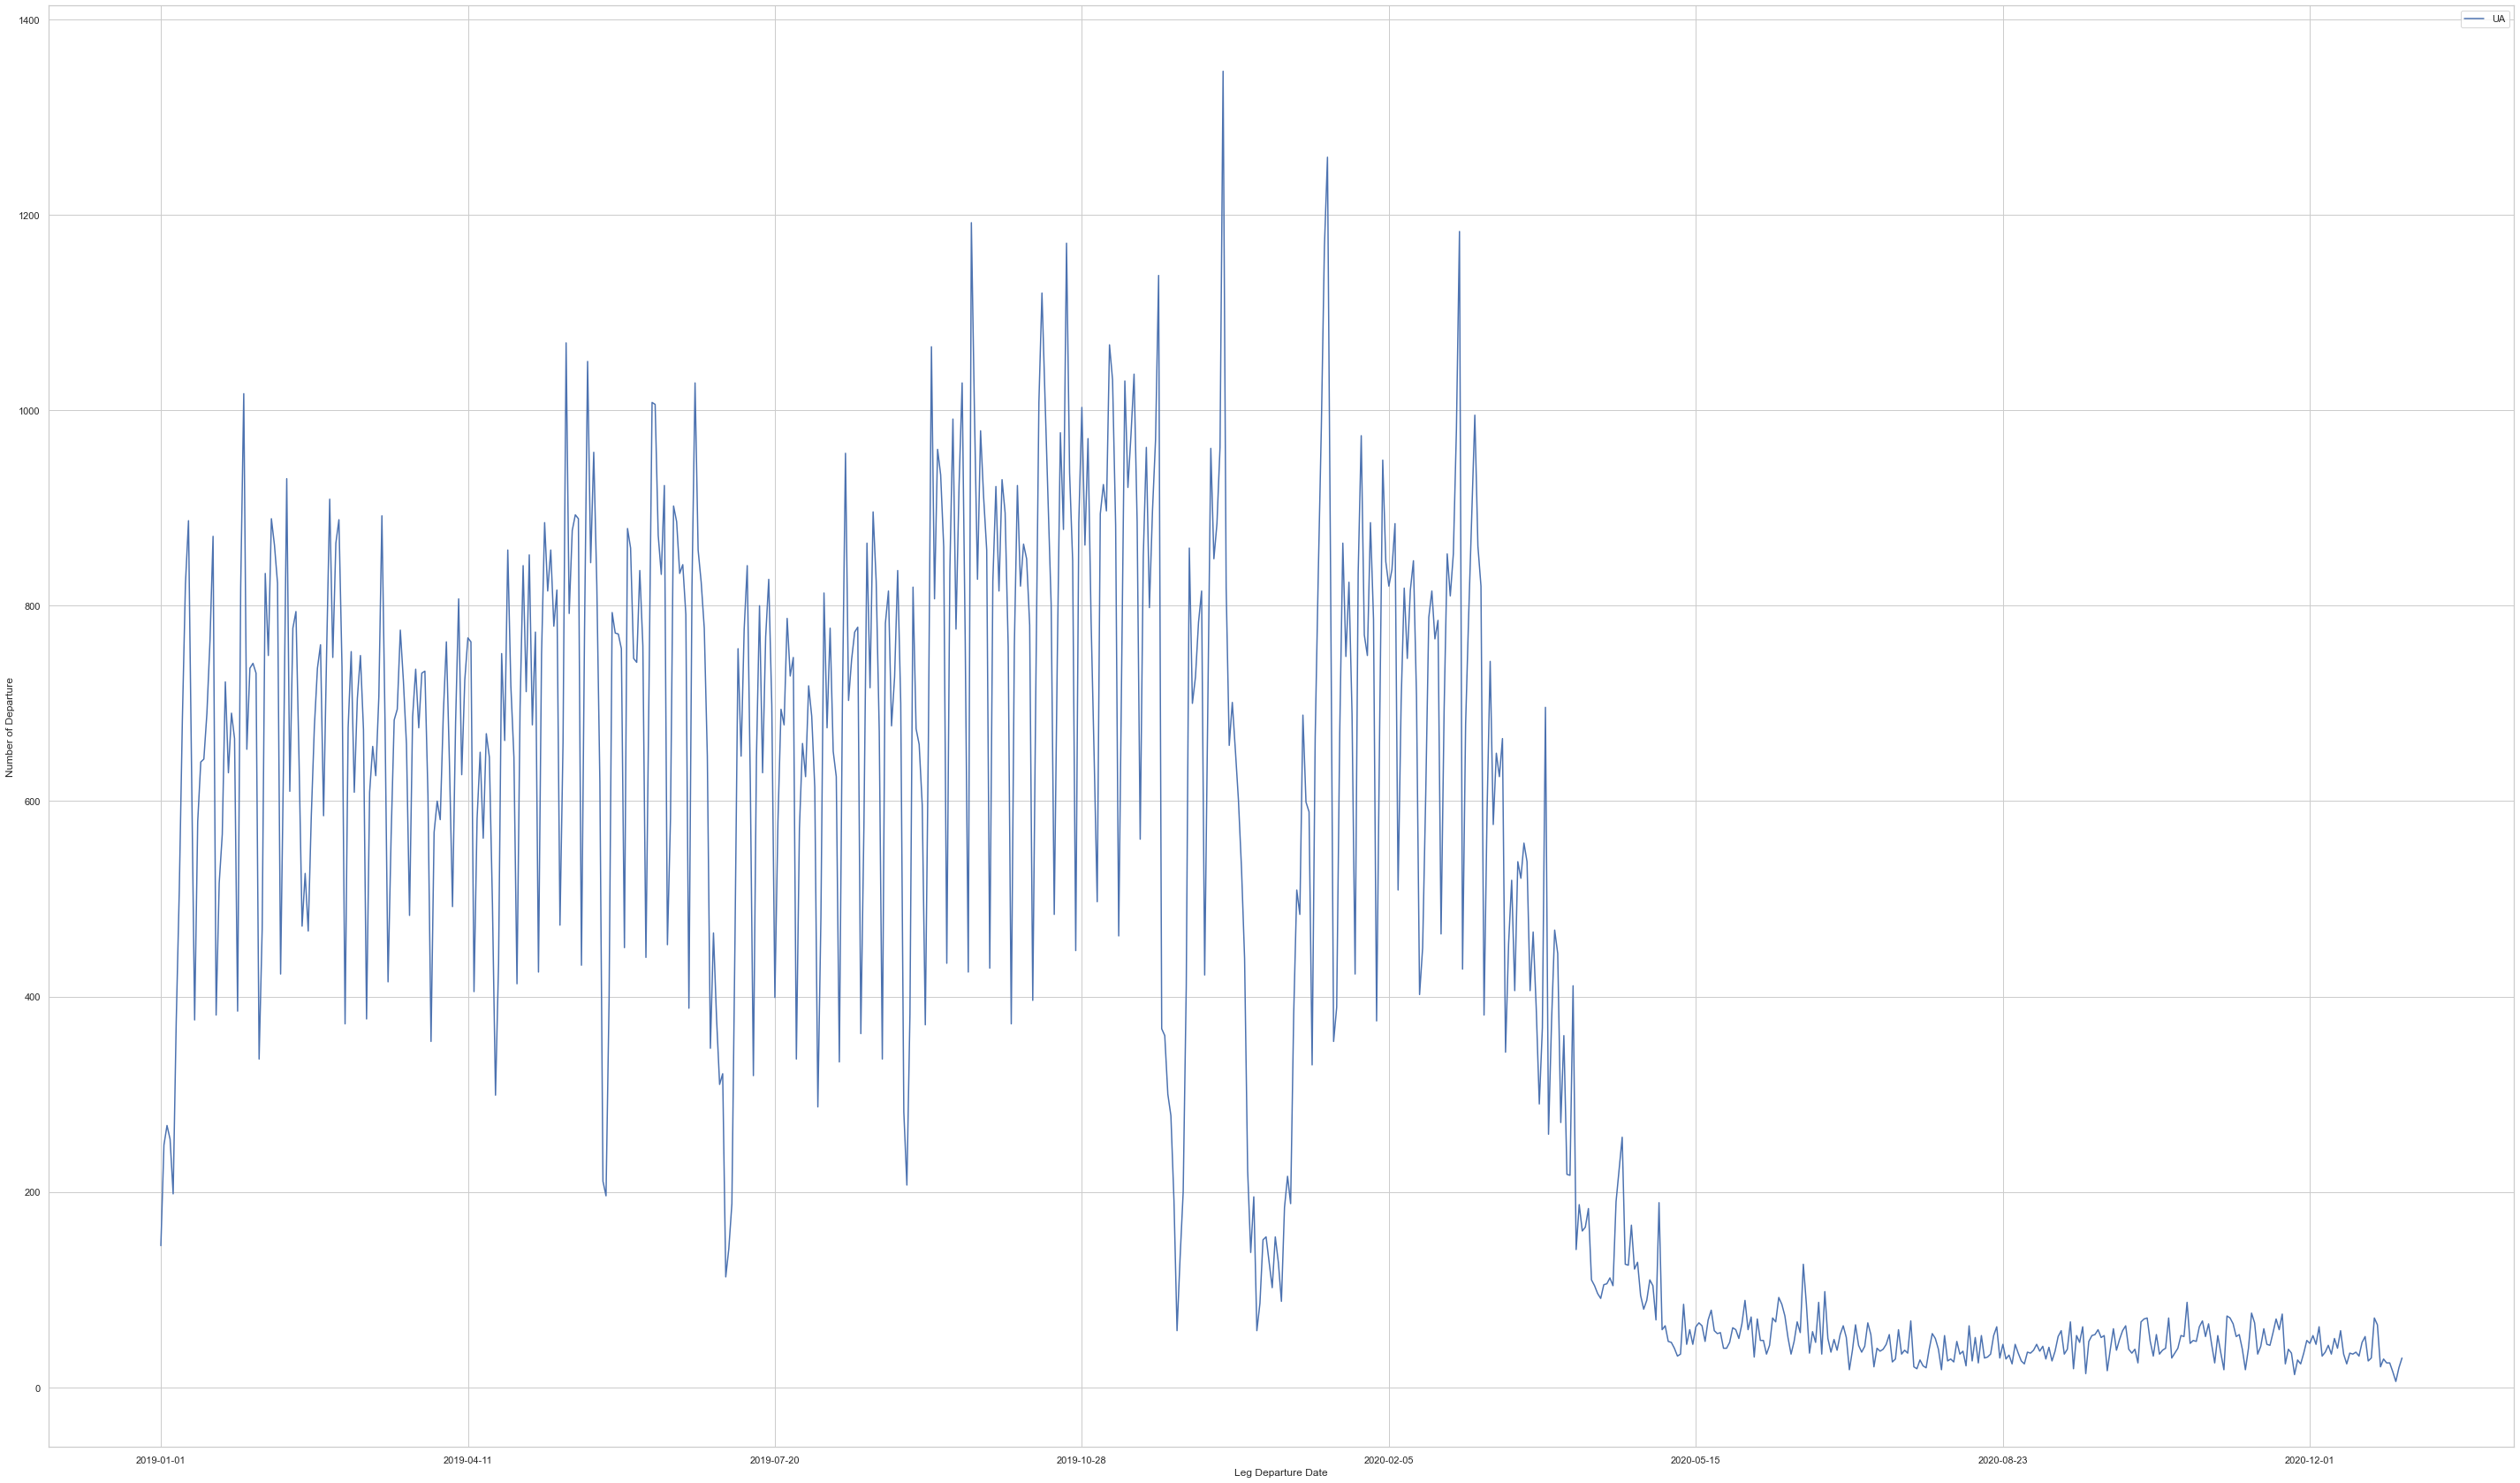

In [37]:
fig, ax = plt.subplots(figsize=(50,30))
for name, group in UA_SFO_count_df.groupby('carrierCode'):
    group.plot(x='legDepartureDate', y='counts', ax=ax, label=name)
    
plt.xlabel('Leg Departure Date')
plt.ylabel('Number of Departure')
plt.legend()
plt.show()

In [38]:
DLAA = ['DL', 'AA']
DLAA_LAX_df = LAX_df[LAX_df['carrierCode'].isin(DLAA)]

data = ['legDepartureDate', 'carrierCode', 'segmentDepartureAirportCode']

# extract necessary columns from the dataframe
DLAA_LAX_count_df = DLAA_LAX_df[data].value_counts().rename_axis(data).reset_index(name='counts')
# sort the dataframe by date and reset the index
DLAA_LAX_count_df = DLAA_LAX_count_df.sort_values(['legDepartureDate'], ascending=True)
DLAA_LAX_count_df = DLAA_LAX_count_df.reset_index(drop=True)
print(DLAA_LAX_count_df)


     legDepartureDate carrierCode segmentDepartureAirportCode  counts
0          2019-01-01          AA                         LAX     136
1          2019-01-01          DL                         LAX     114
2          2019-01-02          DL                         LAX     316
3          2019-01-02          AA                         LAX     386
4          2019-01-03          DL                         LAX     164
...               ...         ...                         ...     ...
1457       2020-12-29          AA                         LAX      86
1458       2020-12-30          DL                         LAX      81
1459       2020-12-30          AA                         LAX      63
1460       2020-12-31          AA                         LAX      44
1461       2020-12-31          DL                         LAX      49

[1462 rows x 4 columns]


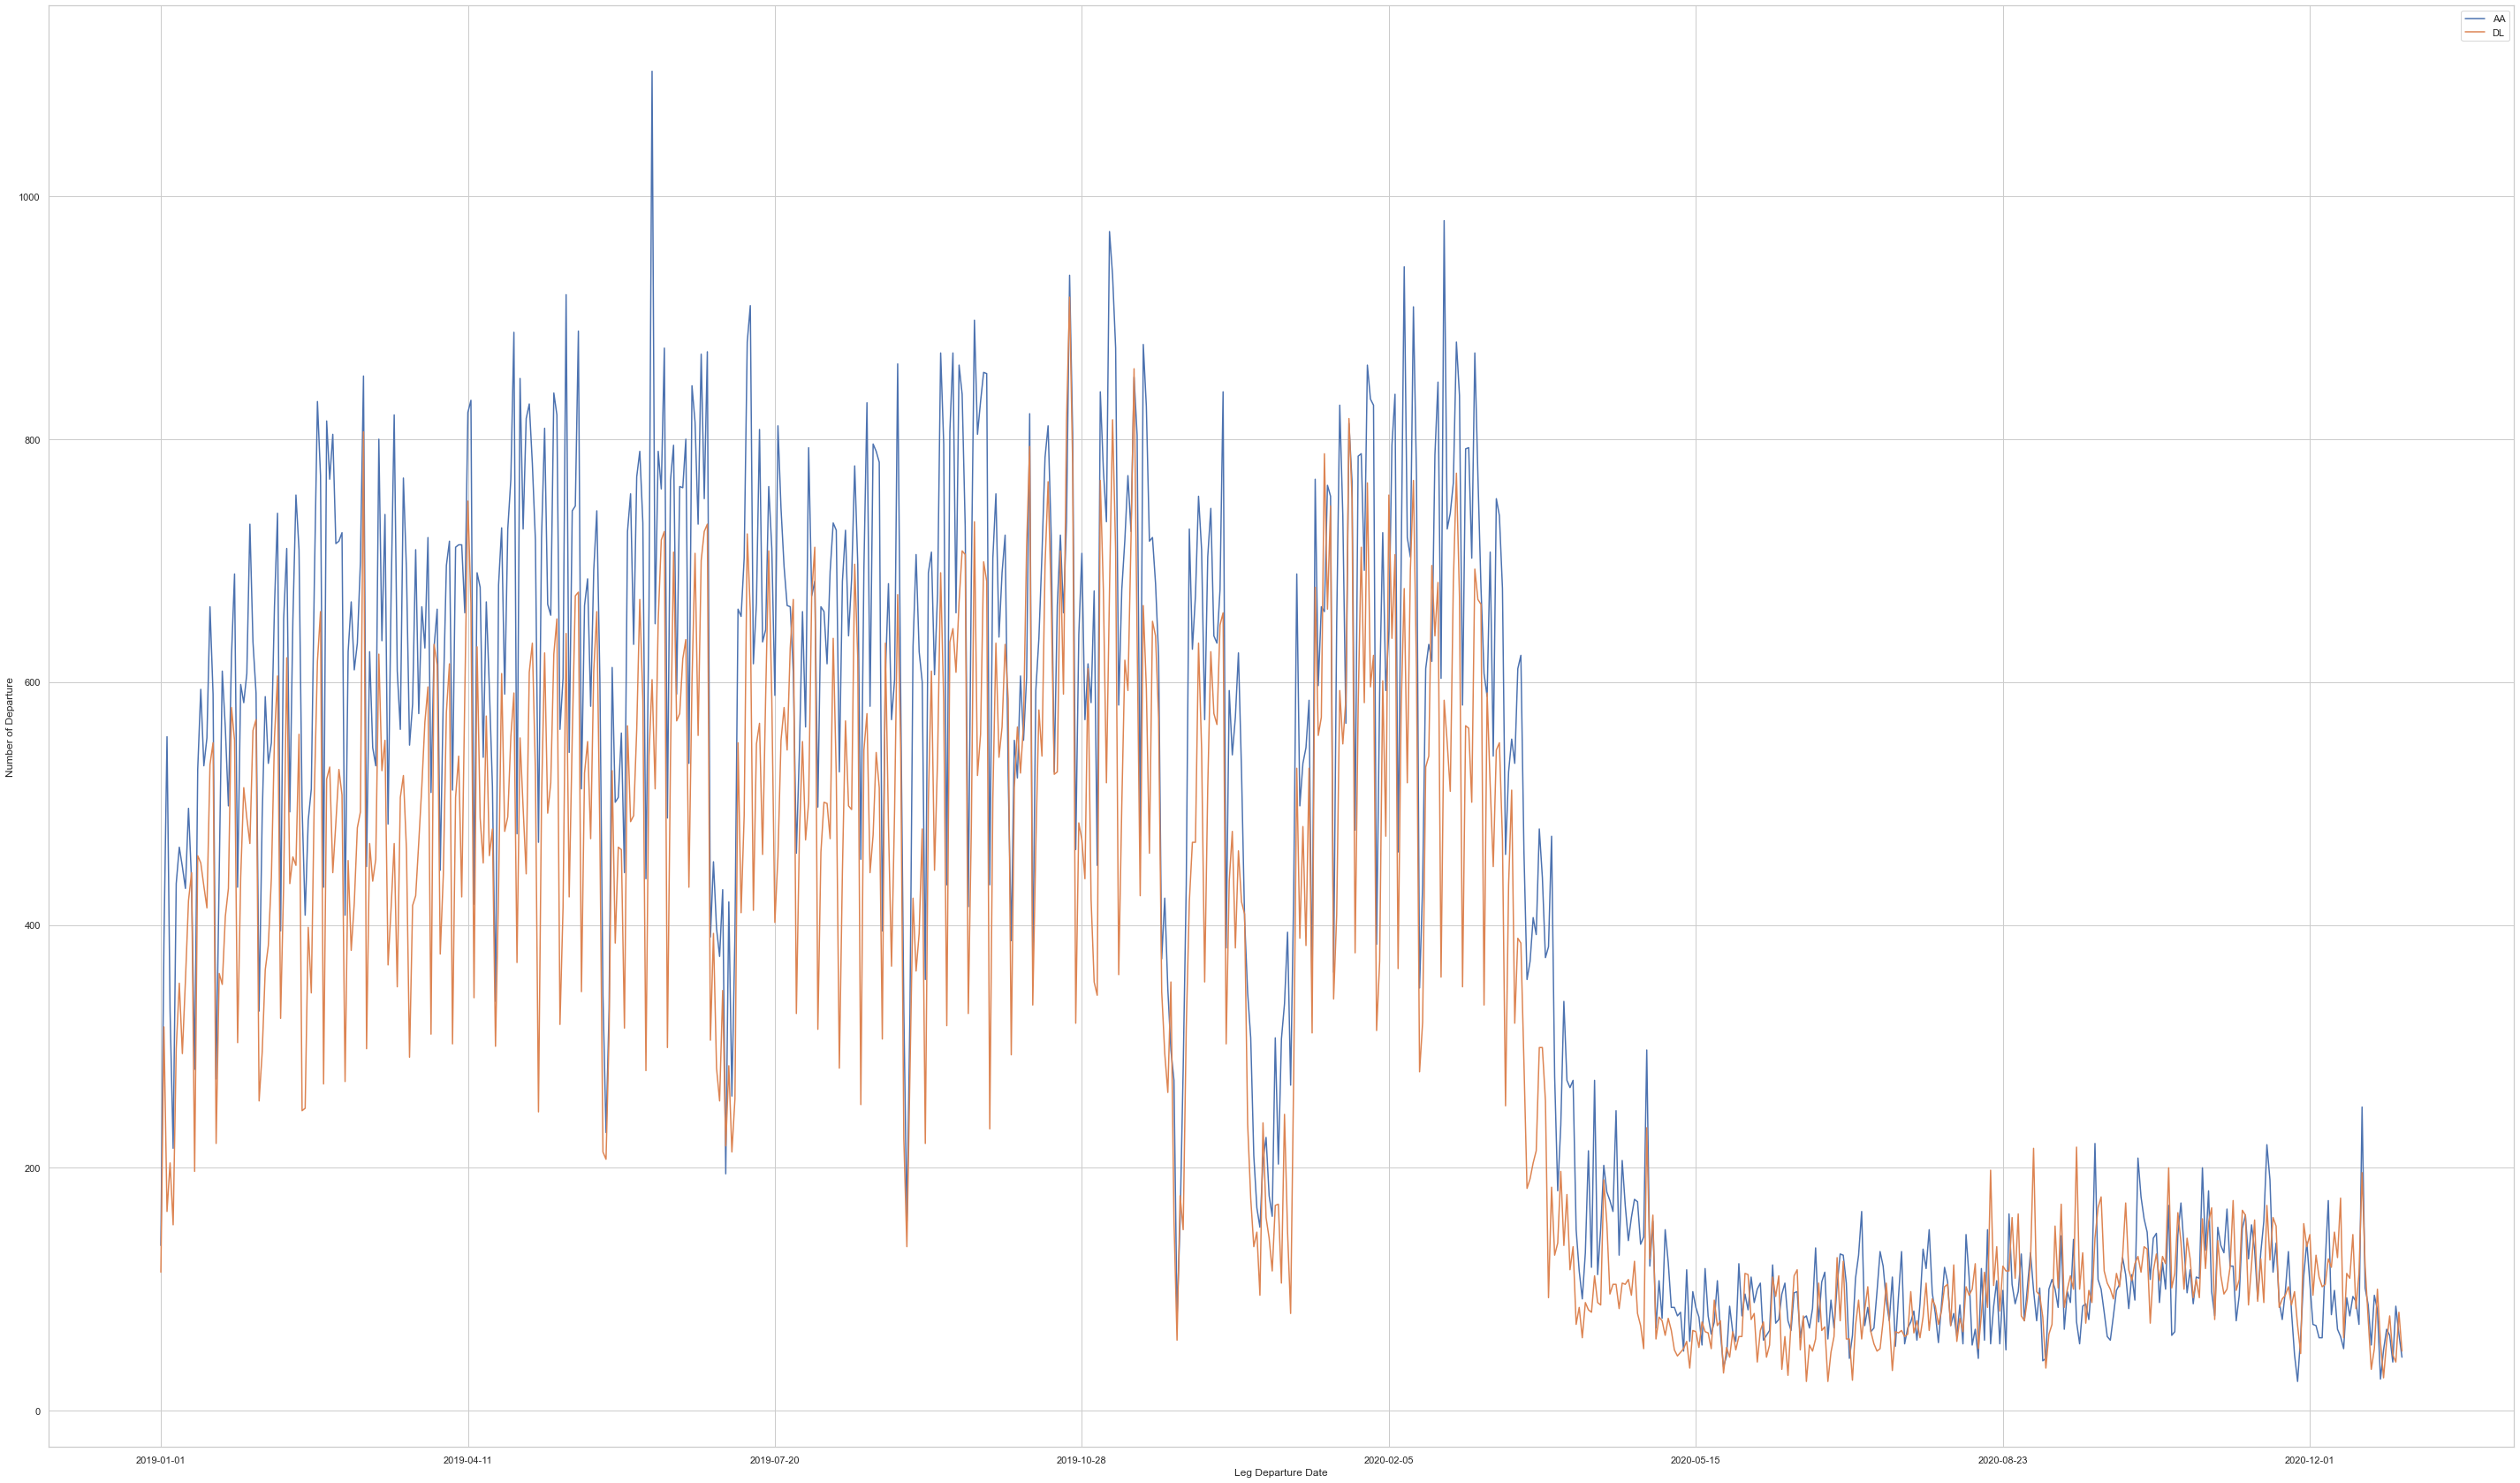

In [40]:
fig, ax = plt.subplots(figsize=(50,30))
for name, group in DLAA_LAX_count_df.groupby('carrierCode'):
    group.plot(x='legDepartureDate', y='counts', ax=ax, label=name)
    
plt.xlabel('Leg Departure Date')
plt.ylabel('Number of Departure')
plt.legend()
plt.show()

In [43]:
top_departure = AA_df['segmentDepartureAirportCode'].value_counts().head(10)
top_departure_list = top_departure.index.tolist()
print(top_departure_list)

top_AA_df = AA_df[AA_df['segmentDepartureAirportCode'].isin(top_departure_list)]

data = ['legDepartureDate', 'carrierCode', 'segmentDepartureAirportCode']

# extract necessary columns from the dataframe
top_AA_count_df = top_AA_df[data].value_counts().rename_axis(data).reset_index(name='counts')
# sort the dataframe by date and reset the index
top_AA_count_df = top_AA_count_df.sort_values(['legDepartureDate'], ascending=True)
top_AA_count_df = top_AA_count_df.reset_index(drop=True)
print(top_AA_count_df)

['DFW', 'ORD', 'DCA', 'PHL', 'CLT', 'LAX', 'SAT', 'PHX', 'MIA', 'BOS']
     legDepartureDate carrierCode segmentDepartureAirportCode  counts
0          2019-01-01          AA                         ORD     213
1          2019-01-01          AA                         BOS      35
2          2019-01-01          AA                         PHL      78
3          2019-01-01          AA                         DCA      48
4          2019-01-01          AA                         MIA     214
...               ...         ...                         ...     ...
7304       2020-12-31          AA                         SAT      46
7305       2020-12-31          AA                         PHL      41
7306       2020-12-31          AA                         DFW     108
7307       2020-12-31          AA                         CLT      34
7308       2020-12-31          AA                         ORD      32

[7309 rows x 4 columns]


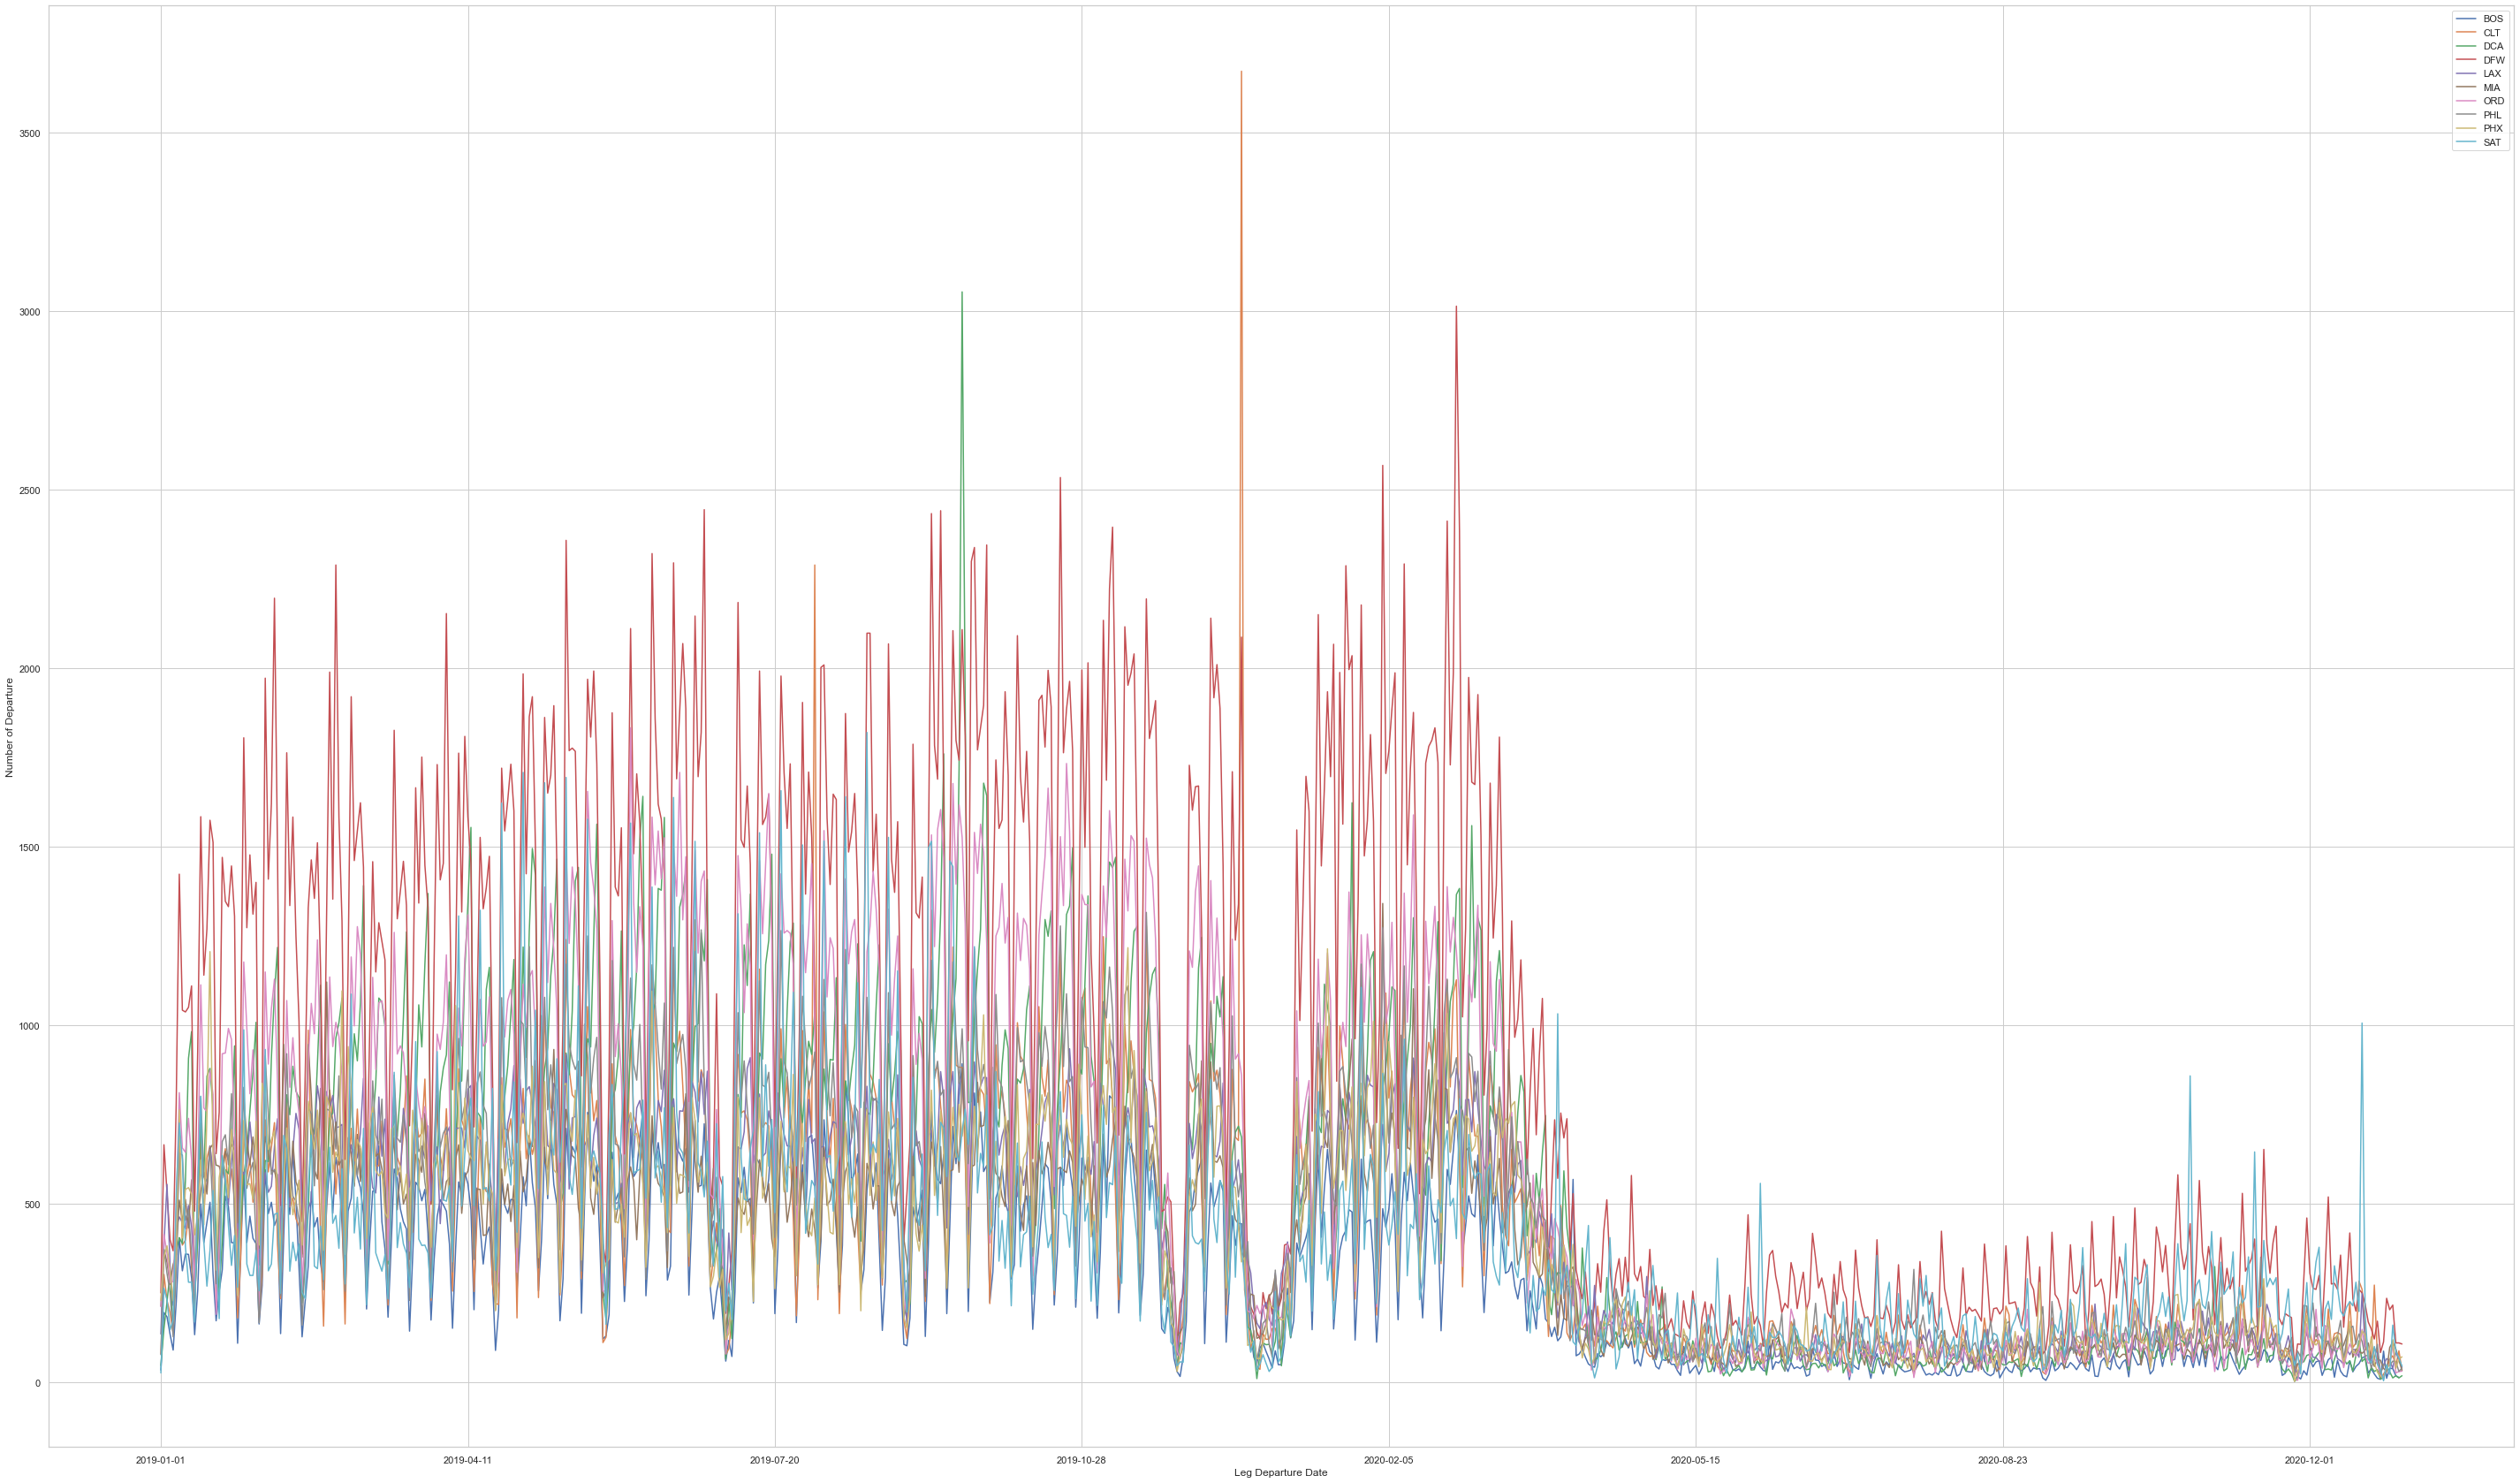

In [46]:
fig, ax = plt.subplots(figsize=(50,30))
for name, group in top_AA_count_df.groupby('segmentDepartureAirportCode'):
    group.plot(x='legDepartureDate', y='counts', ax=ax, label=name)
    
# plt.xticks(rotation=15)
plt.xlabel('Leg Departure Date')
plt.ylabel('Number of Departure')
plt.legend()
plt.show()

In [ ]:
date_carrier = ['legDepartureDate', 'segmentDepartureAirportCode']
date_carrier_df = df[date_carrier].value_counts().rename_axis(date_carrier).reset_index(name='counts')
sorted_date_carrier = date_carrier_df.sort_values(['legDepartureDate'], ascending=True)

In [ ]:
df_airport_date = df['legDepartureDate', 'segmentDepartureAirportCode'].value_counts().rename_axis(date_carrier).reset_index(name='counts')
sorted_date_carrier = date_carrier_df.sort_values(['legDepartureDate'], ascending=True)

In [ ]:
date = sorted_date_carrier['legDepartureDate']
airport = sorted_date_carrier['carrierName']
nb_flights = sorted_date_carrier['counts']

# data (date, airline, nb_flights)  legDepartureDate carrierName counts
# Style
sns.set(font_scale=1)
sns.set_style("whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=date, y=nb_flights, hue=airline)
# ax.axvline(x='2018-07-01', linestyle='--', color='grey')

# Axes
# ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=15)
plt.ylim(0,30) # set the vertical limit of daily departures

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, frameon=0)
plt.suptitle('Number of flights in the US in 2018', x=0.28, y=1.05)
plt.title('Top airlines', loc='left')
# ax.text(x=0.75, y=-0.245, s='Source: tbd',
#       fontsize=8, transform=ax.transAxes)
plt.xlabel('Date');plt.ylabel('Number of daily flights')

In [ ]:
### Data cleaning function for date/time data
### return a list of row that doesn't fulfill the requirement for 'datetime' object
def invalid_time_index(dataframe):
    output = []
    input_list = list(dataframe)
    
    for item in input_list:
         if ((len(item)<1) or (re.search('[a-zA-Z]', item)) or (not re.search('[0-9+]', item))):
                drop = input_list.index(item)
                output.append(drop)
    
    return output

In [ ]:
departure = cleaned_df['legDepartureTime'].value_counts()
departure_time = departure.index.values
print(invalid_time_index(departure_time))

[1127]


In [12]:
# ### two graphs with x-axis = legDate && y-axis = carrierName & segmentDepartureAirportCode

# ## Only include the top 5 carriers here
# carriers = cleaned_df['carrierName'].value_counts().head(5)

# ## Middle 5 test
# carriers = cleaned_df['carrierName'].value_counts().iloc[15:20]
# print(carriers)
# carriers_list = carriers.index.tolist()

# date_carrier = ['legDepartureDate', 'carrierName']
# date_carrier_df = cleaned_df[date_carrier].value_counts().rename_axis(date_carrier).reset_index(name='counts')
# sorted_date_carrier = date_carrier_df.sort_values(['legDepartureDate'], ascending=True)

# # change the date format
# sorted_date_carrier['legDepartureDate'] = pd.to_datetime(sorted_date_carrier['legDepartureDate'], format='%Y%m%d')
# sorted_date_carrier = sorted_date_carrier.loc[sorted_date_carrier['carrierName'].isin(carriers_list)]
# print(sorted_date_carrier)

In [20]:
### two graphs with x-axis = legDate && y-axis = carrierName & segmentDepartureAirportCode

## Only include the top 5 Airport here
carriers = df['segmentDepartureAirportCode'].value_counts().head(5)
carriers_list = carriers.index.tolist()

## Middle 5 test
# carriers = cleaned_df['carrierName'].value_counts().iloc[15:20]
# carriers_list = carriers.index.tolist()

date_carrier = ['legDepartureDate', 'segmentDepartureAirportCode']
date_carrier_df = df[date_carrier].value_counts().rename_axis(date_carrier).reset_index(name='counts')
sorted_date_carrier = date_carrier_df.sort_values(['legDepartureDate'], ascending=True)

# change the date format
sorted_date_carrier = sorted_date_carrier.loc[sorted_date_carrier['segmentDepartureAirportCode'].isin(carriers_list)]

Text(0, 0.5, 'Number of daily flights')

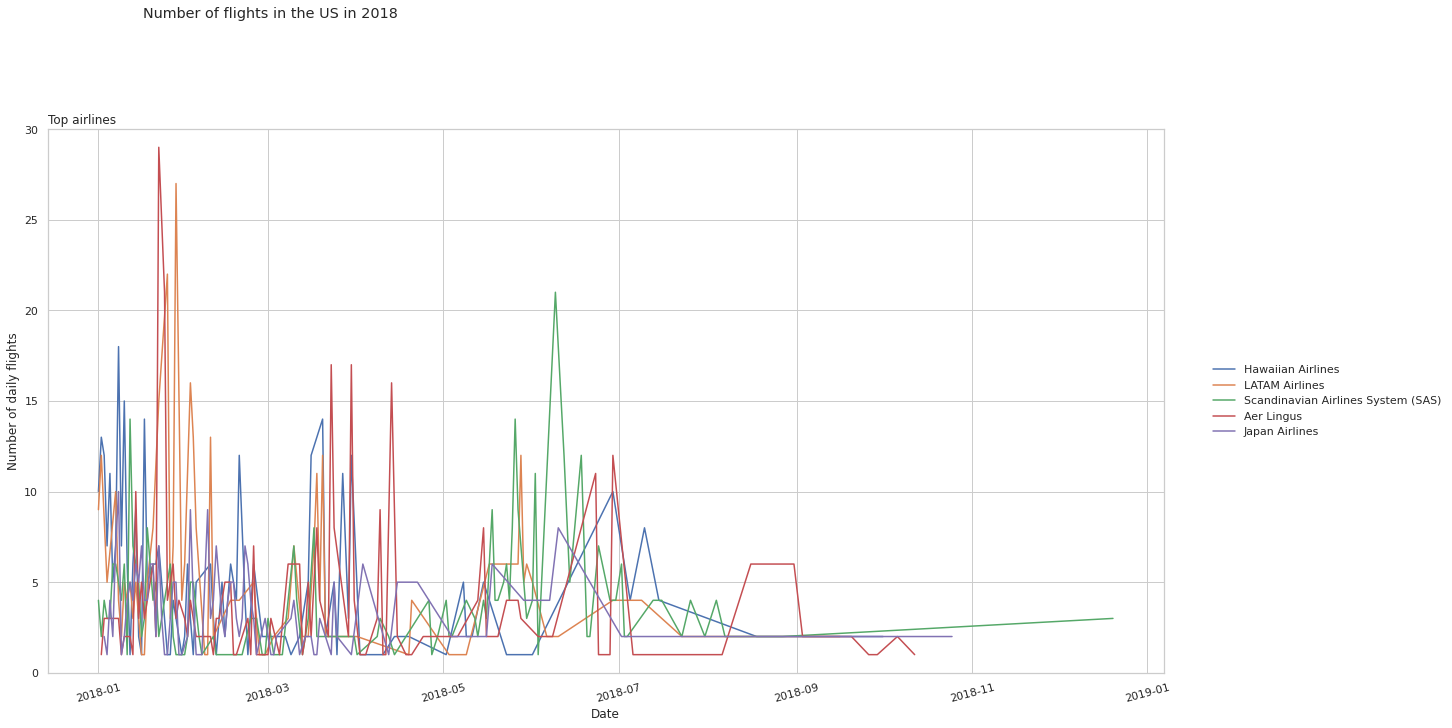

In [ ]:
date = sorted_date_carrier['legDepartureDate']
airline = sorted_date_carrier['carrierName']
nb_flights = sorted_date_carrier['counts']

# data (date, airline, nb_flights)  legDepartureDate carrierName counts
# Style
sns.set(font_scale=1)
sns.set_style("whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x=date, y=nb_flights, hue=airline)
# ax.axvline(x='2018-07-01', linestyle='--', color='grey')

# Axes
# ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=15)
plt.ylim(0,30) # set the vertical limit of daily departures

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, frameon=0)
plt.suptitle('Number of flights in the US in 2018', x=0.28, y=1.05)
plt.title('Top airlines', loc='left')
# ax.text(x=0.75, y=-0.245, s='Source: tbd',
#       fontsize=8, transform=ax.transAxes)
plt.xlabel('Date');plt.ylabel('Number of daily flights')

In [28]:
date = sorted_date_carrier['legDepartureDate']
# plt_dates = mdates.date2num(date.to_datetime().to_pydatetime())
airports = sorted_date_carrier['segmentDepartureAirportCode']
nb_flights = sorted_date_carrier['counts']

# data (date, airline, nb_flights)  legDepartureDate carrierName counts
# Style
sns.set(font_scale=1)
sns.set_style("whitegrid")

# Plot
fig, ax = plt.subplots(figsize=(2000,1000))
sns.lineplot(x=date, y=nb_flights, hue=airports)
# ax.axvline(x='2018-07-01', linestyle='--', color='grey')

# Axes
# ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=15)
plt.ylim(0,30) # set the vertical limit of daily departures

# Legend
handles, labels = ax.get_legend_handles_labels()
myFmt = mdates.DateFormatter("%H:%M:%S")
ax.xaxis.set_major_formatter(myFmt)
ax.legend(handles, labels, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, frameon=0)
# plt.suptitle('Number of flights in the US in 2018', x=0.28, y=1.05)
plt.title('Top Airports', loc='left')
# ax.text(x=0.75, y=-0.245, s='Source: tbd',
#       fontsize=8, transform=ax.transAxes)
plt.gcf().autofmt_xdate()
plt.xlabel('Date');plt.ylabel('Number of daily flights')

Text(0, 0.5, 'Number of daily flights')

ValueError: Image size of 144000x72000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 144000x72000 with 1 Axes>

     legDepartureDate      carrierName  counts
3187       2018-11-28  United Airlines       2
1994       2018-11-24  United Airlines       5
1972       2018-11-18  United Airlines       5
3464       2018-11-16  United Airlines       1
3461       2018-11-14  United Airlines       1
3428       2018-11-07  United Airlines       1
3201       2018-11-06  United Airlines       2
3204       2018-10-30  United Airlines       2
3442       2018-10-29  United Airlines       1
3161       2018-10-27  United Airlines       2
3207       2018-10-16  United Airlines       2
3474       2018-10-13  United Airlines       1
3233       2018-10-12  United Airlines       2
3219       2018-10-11  United Airlines       2
3075       2018-10-08  United Airlines       2
3570       2018-10-06  United Airlines       1
3552       2018-10-01  United Airlines       1
2385       2018-09-30  United Airlines       3
3147       2018-09-27  United Airlines       2
3101       2018-09-25  United Airlines       2
3109       20

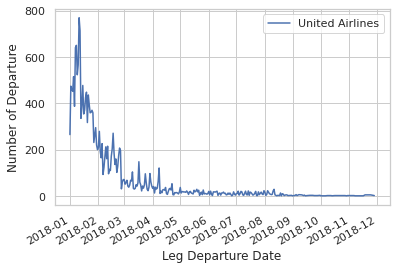

In [ ]:
# test United Airlines  
test_UA = sorted_date_carrier.loc[sorted_date_carrier['carrierName'] == 'United Airlines'].sort_values(['legDepartureDate'], ascending=False)
# print(test_UA)
print(test_UA.to_string())

fig, ax = plt.subplots()
for name, group in test_UA.groupby('carrierName'):
    group.plot(x='legDepartureDate', y='counts', ax=ax, label=name)
    
plt.xlabel('Leg Departure Date')
plt.ylabel('Number of Departure')
plt.legend()
plt.show()



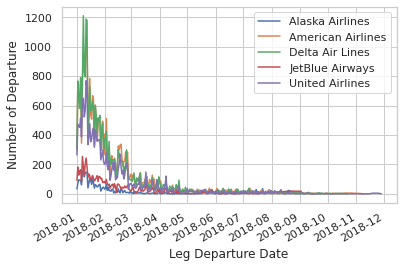

In [ ]:
fig, ax = plt.subplots()
for name, group in sorted_date_carrier.groupby('carrierName'):
    group.plot(x='legDepartureDate', y='counts', ax=ax, label=name)
    
plt.xlabel('Leg Departure Date')
plt.ylabel('Number of Departure')
plt.legend()
plt.show()

In [ ]:
### two graphs with x-axis = legDate && y-axis = carrierName & segmentDepartureAirportCode

# Only include the top 5 here
airports = cleaned_df['segmentDepartureAirportCode'].value_counts().head(5).index.tolist()

target_list = ['legDepartureDate', 'segmentDepartureAirportCode']
timestamp_df = cleaned_df[target_list].value_counts().rename_axis(target_list).reset_index(name='counts')
print(timestamp_df)
timestamp_df = timestamp_df.sort_values('segmentDepartureAirportCode')
date_airport_df = timestamp_df[timestamp_df['segmentDepartureAirportCode'].isin(airports)]
date_airport_df = date_airport_df.sort_values('segmentDepartureAirportCode')
print(date_airport_df)

      legDepartureDate segmentDepartureAirportCode  counts
0             20180111                         MCO     633
1             20180108                         JFK     398
2             20180218                         AUS     332
3             20180112                         SFO     296
4             20180202                         MCO     296
...                ...                         ...     ...
15347         20180314                         ORF       1
15348         20180314                         NRT       1
15349         20180314                         NGS       1
15350         20180314                         MHT       1
15351         20180101                         ABQ       1

[15352 rows x 3 columns]
      legDepartureDate segmentDepartureAirportCode  counts
3434          20180607                         BOS       7
178           20180106                         BOS      79
8601          20180405                         BOS       2
11035         20180628        

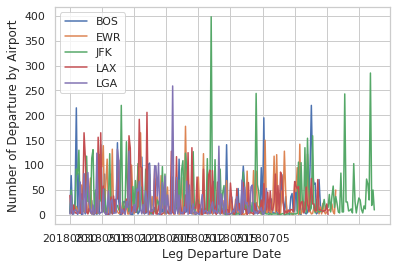

In [ ]:
fig, ax = plt.subplots()
for name, group in date_airport_df.groupby('segmentDepartureAirportCode'):
    group.plot(x='legDepartureDate', y='counts', ax=ax, label=name)
    
plt.xlabel('Leg Departure Date')
plt.ylabel('Number of Departure by Airport')
plt.legend()
plt.show()

In [ ]:
### Code for stock information

# United Airlines, Delta Airlines

tickers = ["UAL","DAL"]
end = dt.datetime.now().strftime("%Y-%m-%d")
start = (dt.datetime.now()-dt.timedelta(days=365*3)).strftime("%Y-%m-%d")
data = []
for ticker in tickers:
    sub_df = pdr.get_data_yahoo(ticker, start, end)
    sub_df["name"] = ticker
    data.append(sub_df)
data = pd.concat(data)